# Frequecy domain image processing
It is possible to take the Fourier transform of 2D signals just like 1D signals and analyse them in the frequency domain.

In 1D we can show that the Fourier transform of a pulse corresponds to the *sinc* function which has a peak at $0$ Hertz. The equivalent signal in 2D is a rectangle.

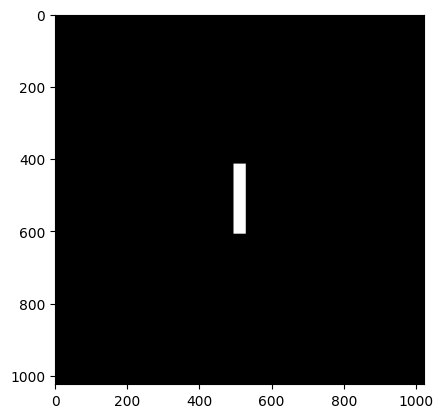

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread("img/rectangle.tif")
plt.imshow(image, cmap='gray')
plt.show()

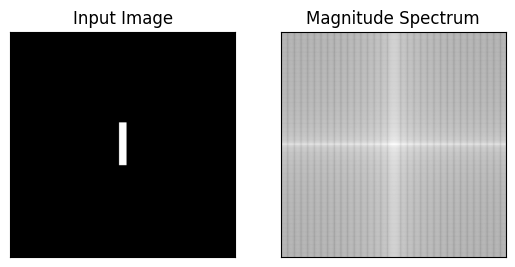

In [2]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift + 1e-8))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Frequency components in images
In images, low frequency content corresponds to areas of gradual variation. For example a wall in a room would correspond to low frequency content. Edges and areas of rapid variation are high frequency components.

If there are repeated structures in the image, these emerge as a strong frequency component. The Fourier transform also captures the direction of the variation

In [3]:
I1_low = np.zeros((64,64))
I2_low = np.zeros((64,64))

for i in range(0, I1_low.shape[0], 8):
    I1_low[:,i] = np.ones(I1_low.shape[0])
    I2_low[i,:] = np.ones(I1_low.shape[0]) 

I1_high = np.zeros((64,64))
I2_high = np.zeros((64,64))

for i in range(0, I1_high.shape[0], 4):
    I1_high[:,i] = np.ones(I1_high.shape[0])
    I2_high[i, :] = np.ones(I1_high.shape[0]) 

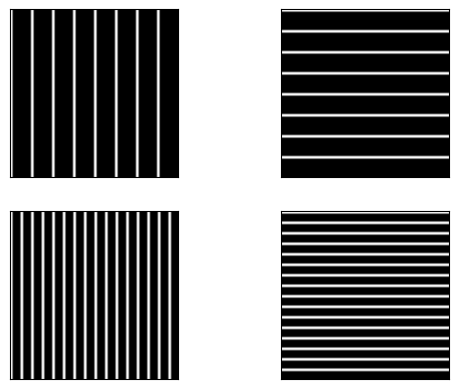

In [4]:
plt.subplot(221)
plt.imshow(I1_low, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(I2_low, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(I1_high, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(I2_high, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

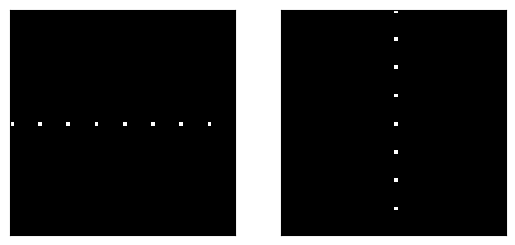

In [5]:
f1_low = np.fft.fft2(I1_low)
f1_low_shift = np.fft.fftshift(f1_low)

f2_low = np.fft.fft2(I2_low)
f2_low_shift = np.fft.fftshift(f2_low)

magnitude_spectrum1 = 20*np.log(np.abs(f1_low_shift + 1e-8))
magnitude_spectrum2 = 20*np.log(np.abs(f2_low_shift + 1e-8))

plt.subplot(121)
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

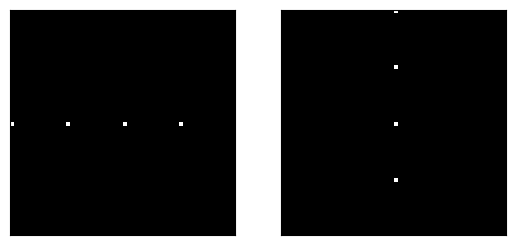

In [6]:
f1_high = np.fft.fft2(I1_high)
f1_high_shift = np.fft.fftshift(f1_high)

f2_high = np.fft.fft2(I2_high)
f2_high_shift = np.fft.fftshift(f2_high)

magnitude_spectrum1 = 20*np.log(np.abs(f1_high_shift + 1e-8))
magnitude_spectrum2 = 20*np.log(np.abs(f2_high_shift + 1e-8))

plt.subplot(121)
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Effect of rotation
Let us examine the Fourier transform of a rotated image. 

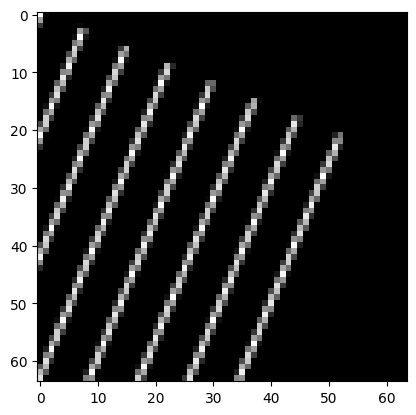

In [7]:
# rotation
theta = np.pi / 8
M = np.float32([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0]])
dst = cv.warpAffine(I1_low, M, (I1_low.shape[0], I1_low.shape[0]))

plt.imshow(dst, cmap='gray')
plt.show()

([], [])

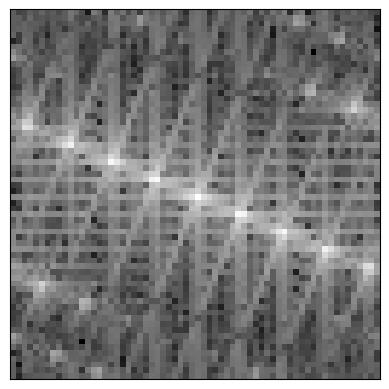

In [8]:
f_rotated= np.fft.fft2(dst)
f_rotated_shift = np.fft.fftshift(f_rotated)

magnitude_spectrum_rotated = 20*np.log(np.abs(f_rotated_shift + 1e-8))

plt.imshow(magnitude_spectrum_rotated, cmap = 'gray')
plt.xticks([])
plt.yticks([])

## Frequency domain filtering
Frequency domain filtering is achieved by taking the inverse Fourier transform of the product of the image Fourier transform and that of the desired filter.

That is

\begin{equation}
g(x,y) = \mathrm{Real}\{ \mathcal{F}^{-1}[H(u,v)F(u,v)]\}
\end{equation}

The sections below follow [this link](https://stackoverflow.com/questions/66935821/how-to-apply-a-lpf-and-hpf-to-a-fft-fourier-transform).

## Ideal Low Pass Filter
The ideal low pass filter is given by

\begin{equation}
H(u,v)=
\begin{cases}
1 & D(u,v) \leq D_0\\
0 & D(u,v) > D_0
\end{cases}
\end{equation}

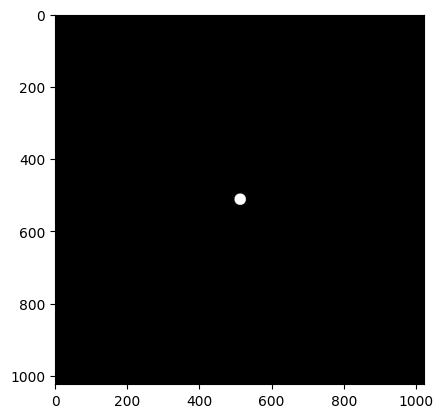

In [9]:
D0 = 16

image = img.imread("img/rectangle.tif")
mask = np.zeros_like(image)

cy = mask.shape[0] // 2
cx = mask.shape[1] // 2

cv.circle(mask, (cx,cy), D0, (255,255,255), -1)[0]

plt.imshow(mask, cmap='gray')
plt.show()

In [10]:
# Take DFT of rectangle and multiply with ILPF
f_rec = np.fft.fft2(image)
f_rec_shift = np.fft.fftshift(f_rec)

filtered = np.multiply(f_rec_shift, mask) / 255

shift_filtered = np.fft.ifftshift(filtered)
img_filtered = np.fft.ifft2(shift_filtered, axes=(0,1))

img_filtered[0,0]

(2.5743673883413045-6.665674956440881e-16j)

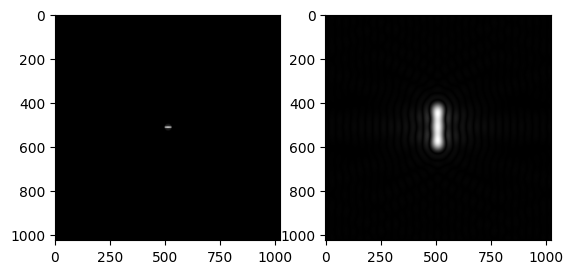

In [11]:
# get the magnitude
filtered_mag = np.abs(shift_filtered).clip(0,255).astype(np.uint8)


plt.subplot(121)
plt.imshow(np.abs(filtered), cmap='gray')

plt.subplot(122)
plt.imshow(np.abs(img_filtered), cmap='gray')
plt.show()

## Ideal High Pass Filter
The ideal high pass filter is given by

\begin{equation}
H(u,v)=
\begin{cases}
0 & D(u,v) \leq D_0\\
1 & D(u,v) > D_0
\end{cases}
\end{equation}

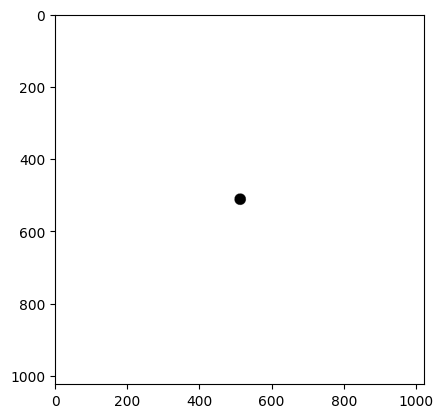

In [12]:
# create the IHPF
mask = 255 - mask

plt.imshow(mask, cmap='gray')
plt.show()

In [13]:
# apply to image
filtered = np.multiply(f_rec_shift, mask) / 255

shift_filtered = np.fft.ifftshift(filtered)
img_filtered = np.fft.ifft2(shift_filtered, axes=(0,1))

img_filtered[0,0]

(-2.5743673883413085+4.397524011601206e-16j)

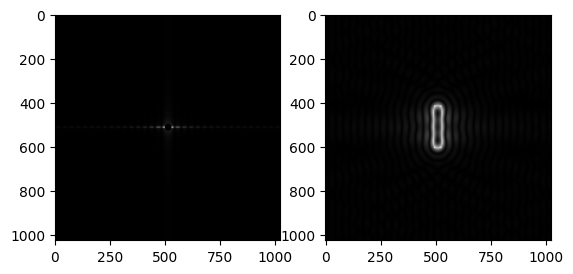

In [14]:
# get the magnitude
filtered_mag = np.abs(shift_filtered).clip(0,255).astype(np.uint8)


plt.subplot(121)
plt.imshow(np.abs(filtered), cmap='gray')

plt.subplot(122)
plt.imshow(np.abs(img_filtered), cmap='gray')
plt.show()